In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sklearn

In [25]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
#Customer id is not required
df=df.drop(columns=['CustomerID'], axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [ ]:
df.corr()['Spending Score (1-100)'].sort_values(ascending=False)

<ipython-input-12-5bf7ba7f7e53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Spending Score (1-100)'].sort_values(ascending=False)


Spending Score (1-100)    1.000000
Annual Income (k$)        0.009903
Age                      -0.327227
Name: Spending Score (1-100), dtype: float64

# Univariate Analysis

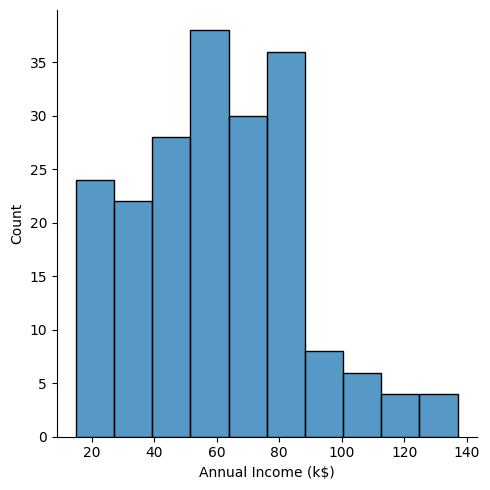

In [ ]:
sns.displot(df['Annual Income (k$)'])

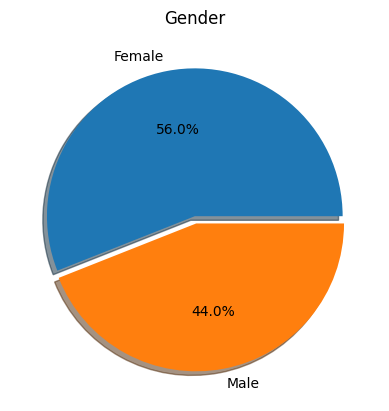

In [ ]:
plt.pie(df.Gender.value_counts(), [0, 0.05], labels = ['Female', 'Male'], autopct ='%1.1f%%', shadow=True)
plt.title('Gender')
plt.show()

# Bivariate Analysis

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

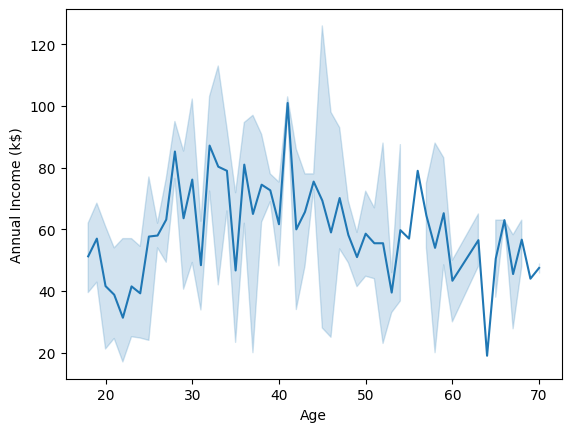

In [ ]:
sns.lineplot(x=df.Age, y=df['Annual Income (k$)'])

# Multivariate Analysis

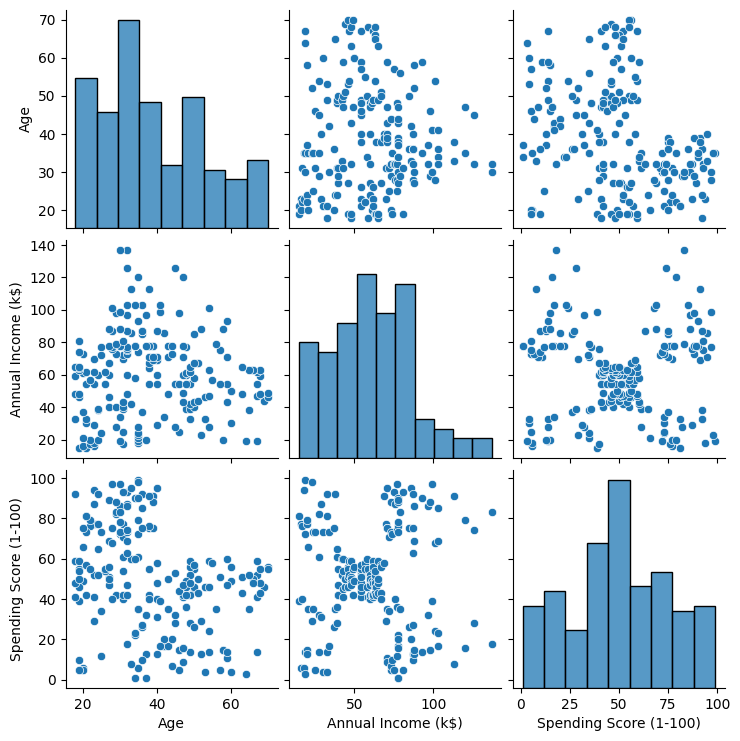

In [ ]:
sns.pairplot(df)

<ipython-input-17-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

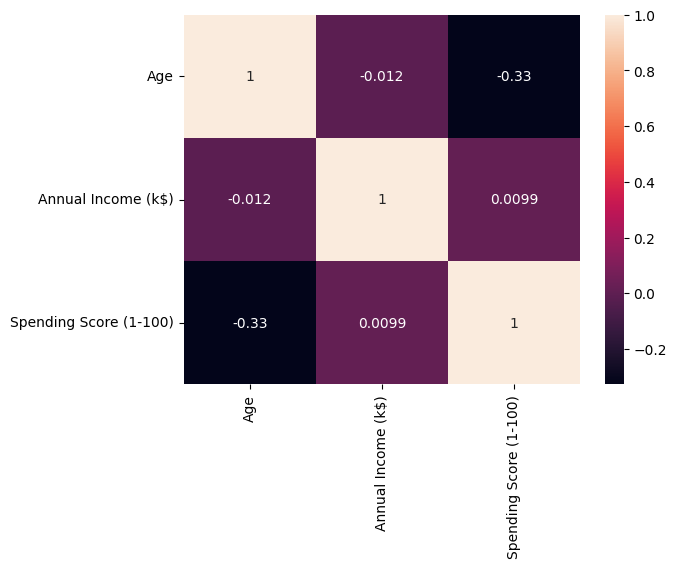

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [27]:
#Spliting Data
new_df=df.iloc[:,:-1]
new_df.head()

,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17


In [31]:
#Performing Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df.Gender=le.fit_transform(new_df.Gender)
new_df.head()

,Gender,Age,Annual Income (k$)
0,1,19,15.0
1,1,21,15.0
2,0,20,16.0
3,0,23,16.0
4,0,31,17.0


# Outlier Detection

## Age

<Axes: >

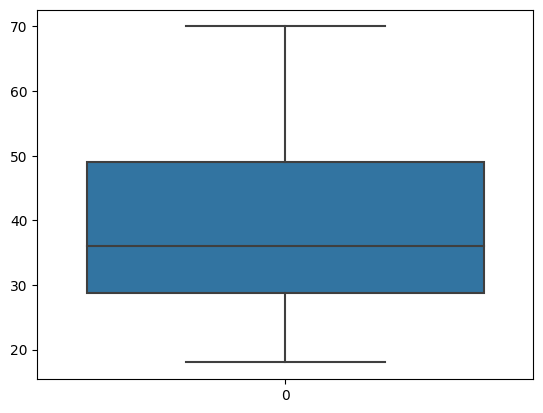

In [28]:
sns.boxplot(new_df.Age)

<Axes: >

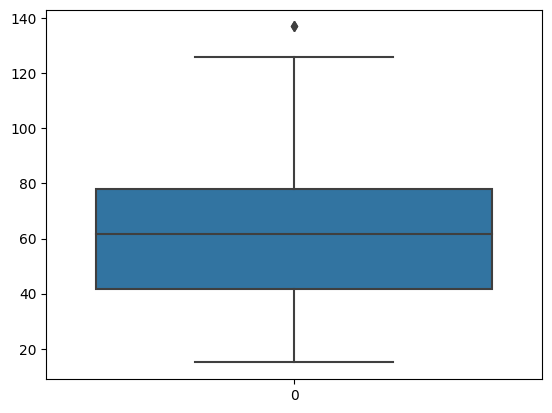

In [29]:
sns.boxplot(new_df['Annual Income (k$)'])

<Axes: >

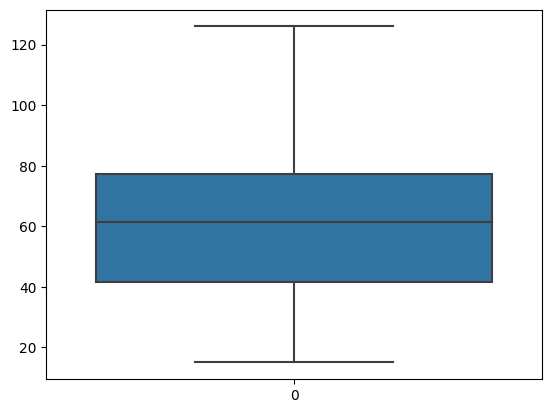

In [30]:
q1 = new_df['Annual Income (k$)'].quantile(0.25)
q3 = new_df['Annual Income (k$)'].quantile(0.75)
IQR = q3 - q1
uLimit = q3 + 1.5*IQR
lLimit = q1 - 1.5*IQR
med = new_df['Annual Income (k$)'].median()
new_df['Annual Income (k$)'] = np.where(new_df['Annual Income (k$)'] > uLimit, med, new_df['Annual Income (k$)'])
new_df['Annual Income (k$)'] = np.where(new_df['Annual Income (k$)'] < lLimit, med, new_df['Annual Income (k$)'])
sns.boxplot(new_df['Annual Income (k$)'])

# Model Building


In [32]:
from sklearn import cluster

In [33]:
error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(new_df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [34]:
error

[164359.67499999996,
 81034.20067820631,
 54327.95595202399,
 36963.658607350095,
 29943.015021645027,
 23716.791456359257,
 20690.55822218927,
 17764.854949296823,
 15048.03495770057,
 13319.170593402048]

Text(0, 0.5, 'Error')

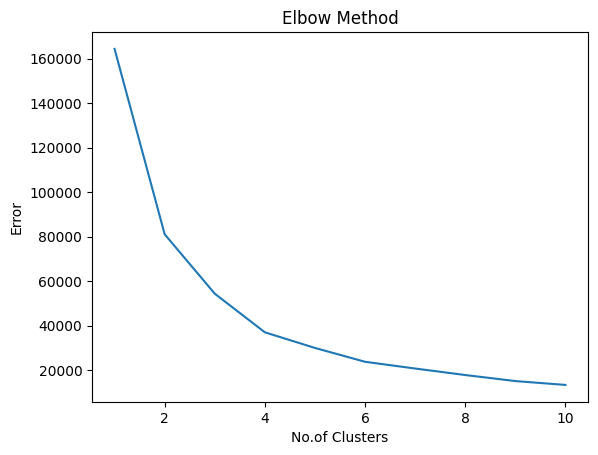

In [35]:
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('Error')

In [36]:
km_model=cluster.KMeans(n_clusters=6,init='k-means++',random_state=0)
km_model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [37]:
pred=km_model.predict(new_df)
pred

array([4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 3, 5, 3, 3, 5, 3, 3, 3, 5,
       1, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 5, 5, 3, 3, 5, 3, 3, 5, 3, 3, 5,
       5, 3, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 3, 5, 3, 5, 3, 3, 3, 3,
       3, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 2, 2, 2, 5, 2, 2, 2, 3, 2, 2, 2,
       5, 2, 5, 2, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 5], dtype=int32)

In [38]:
df["label"] = pred

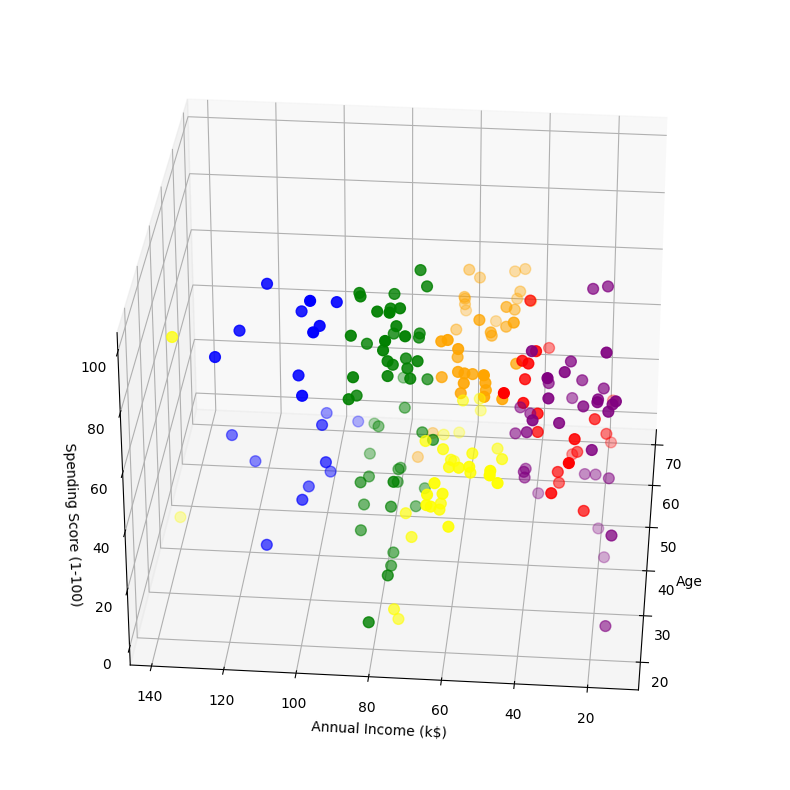

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='yellow', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()